In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Question 1
We grab the data

In [26]:
import csv
 
fname = "exp.csv"
file = open(fname, "r")
reader = csv.reader(file)
data = {}
k = 0
l = 0
raw_data = []
for row in reader:
    if k!= 0:
        if not l in data:
            data[l] = []
        raw_data.append(row)
        data[l].append(k-1)
        #print(row)
    if k != 0 and k%96 == 0:
        l += 1
    k += 1
for d in data:
    data[d] = np.asarray(data[d]).reshape(8,12)
file.close()

In [70]:
def get_data_ij(i,j,f):
    x = range(316)
    y = []
    for t in x:
        y.append(raw_data[data[t][i][j]][f])
    return y
def get_data_ij2(i,j):
    tt = range(316)
    x = []
    y = []
    for t in tt:
        x.append(raw_data[data[t][i][j]][2])
        y.append(raw_data[data[t][i][j]][3])
    return x,y

We plot it

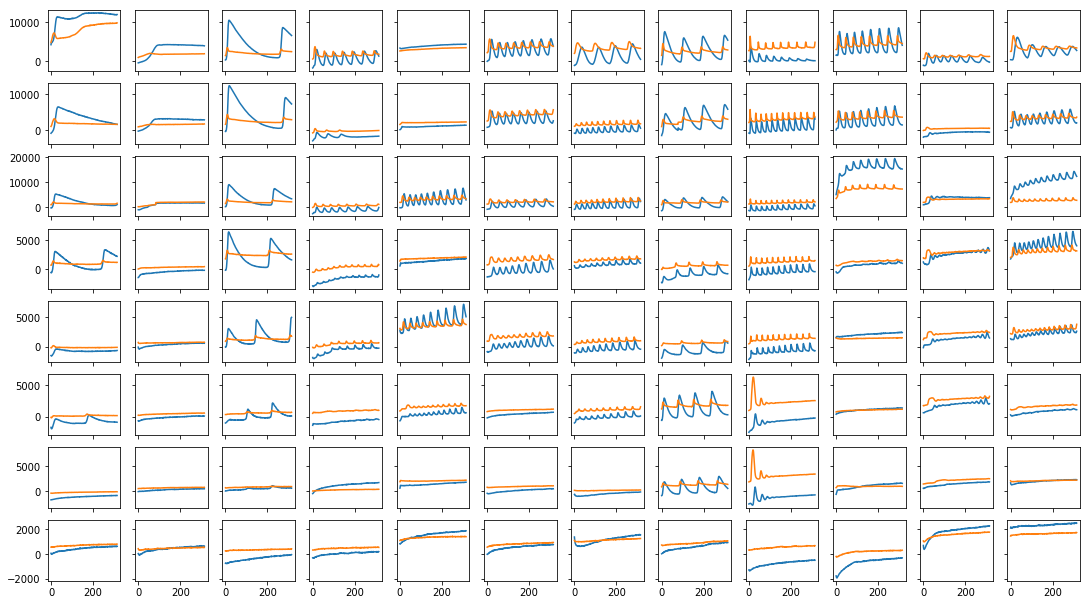

In [72]:
"""Examples illustrating the use of plt.subplots().

This function creates a figure and a grid of subplots with a single call, while
providing reasonable control over how the individual plots are created.  For
very refined tuning of subplot creation, you can still use add_subplot()
directly on a new figure.
"""

import matplotlib.pyplot as plt
import numpy as np

# Simple data to display in various forms
x = range(316)

plt.close('all')

# row and column sharing
f, ax = plt.subplots(8, 12, sharex='col', sharey='row')
f.set_size_inches(18.5, 10.5)
for i in range(8):
    for j in range(12):
        ax[i][j].plot(x,get_data_ij(i,j,2))
        ax[i][j].plot(x,get_data_ij(i,j,3))
plt.show()

# Question 2
We plot trajectories

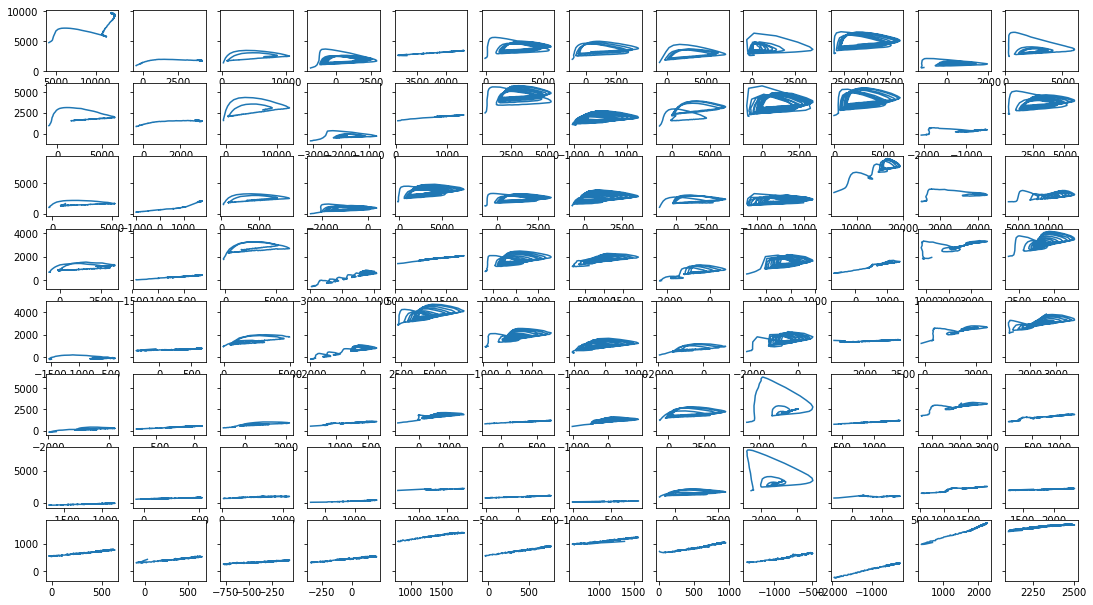

In [88]:
"""Examples illustrating the use of plt.subplots().

This function creates a figure and a grid of subplots with a single call, while
providing reasonable control over how the individual plots are created.  For
very refined tuning of subplot creation, you can still use add_subplot()
directly on a new figure.
"""

import matplotlib.pyplot as plt
import numpy as np

# Simple data to display in various forms
plt.close('all')

# row and column sharing
f2, ax2 = plt.subplots(8, 12, sharey='row')
f2.set_size_inches(18.5, 10.5)
for i in range(8):
    for j in range(12):
        x,y = get_data_ij2(i,j)
        ax2[i][j].plot(x,y)

plt.show()

# Question 3
From the following plot we deduce blue is predator and orange is prey

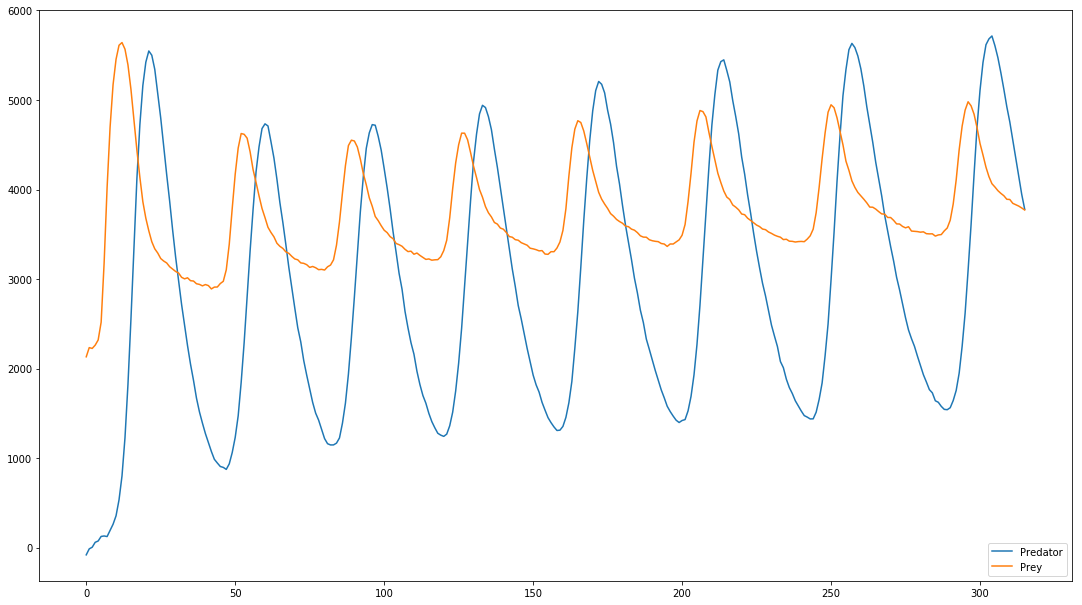

In [76]:
x = range(316)
f3, ax3 = plt.subplots(1, 1)
f3.set_size_inches(18.5, 10.5)
ax3.plot(x,get_data_ij(0,5,2),label='Predator')
ax3.plot(x,get_data_ij(0,5,3),label='Prey')
ax3.legend()
plt.show()

In [77]:
import numpy.fft as fft

def get_period(signal,p=False):
    spectrum = fft.fft(signal)
    freq = fft.fftfreq(len(spectrum))
    last_m = 0
    last_freq = 0
    new_x = []
    new_y = []
    for (i,the_freq) in enumerate(freq):
        if the_freq > 0.0125 and abs(spectrum)[i] >= last_m:
            last_m = abs(spectrum)[i]
            last_freq = the_freq
        if True:
            new_x.append(the_freq)
            new_y.append(abs(spectrum)[i])
    if p:
        plt.plot(new_x,new_y)
            #print(last_freq)
    #if 1/last_freq == 316.0:
        #return 0.0
    if p:
        print(last_freq)
    return 1/last_freq

# Question 4
Period heatmap

In [193]:
heat_map1 = []
for i in range(8):
    for j in range(12):
        heat_map1.append(get_period(get_data_ij(i,j,2)))
heat_map1 = np.asarray(heat_map1).reshape((8,12))
heat_map2 = []
for i in range(8):
    for j in range(12):
        heat_map2.append(get_period(get_data_ij(i,j,3)))
heat_map1 = np.asarray(heat_map1).reshape((8,12))
heat_map2 = np.asarray(heat_map1).reshape((8,12))

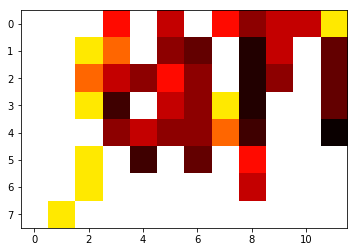

In [194]:
plt.imshow(heat_map1, cmap='hot', interpolation='nearest')
plt.show()

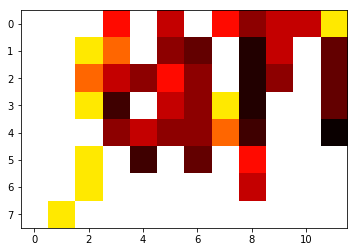

In [195]:
plt.imshow(heat_map2, cmap='hot', interpolation='nearest')
plt.show()

# Question 5
Modele theorique

In [30]:
from scipy import integrate
def dy_dt(t, y, g, exo):
            
    prey = y[0]
    pred = y[1]
    y = np.zeros((2,1))
    y[0] = (g*prey)/(1+(g/2)*prey)-prey*pred-0.3*exo*prey/(1+pred)
    y[1] = prey*pred - exo*(pred)/(1+pred)
    return y
 
def model_results(g,exo):
    r = integrate.ode(dy_dt).set_integrator('vode', method='bdf')
    # Part 1:
    ICs = [0.1, 0.1]
    # Part 2: use the steady-state solution
    t_0 = 0.0
    r.set_initial_value(ICs, t_0).set_f_params(g,exo)
    t_final = 100.0
    dt = 0.5

    # Create vectors to store the solutions in; 
    #     add extra space for intial condition
    n_steps = np.floor((t_final - t_0)/dt) + 1
    n_steps = n_steps.astype(np.int64)
    time = np.zeros(n_steps)
    N = np.zeros(n_steps)
    B = np.zeros(n_steps)
    N[0], B[0] = ICs
    k = 1
    while r.successful() and r.t < t_final:
        r.integrate(r.t + dt)
        time[k] = r.t
    
        N[k] = r.y[0]
        B[k] = r.y[1]
        k += 1
    return time,B,N

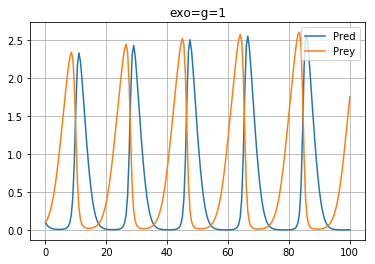

In [31]:
time,B,N = model_results(1.0,1.0)
plt.plot(time, B, label='Pred')
plt.plot(time, N, label='Prey')
plt.legend(loc='best')
plt.title("exo=g=1")
plt.grid('on')

# Question 6

In [ ]:
f_model, ax_model = plt.subplots(8, 6)
f_model.set_size_inches(18.5, 10.5)

param_g = np.linspace(0,1.4,8)
param_exo = np.linspace(0.1,1.2,6)

for i in range(8):
    for j in range(6):
        time,B,N = model_results(param_g[7-i],param_exo[j])
        ax_model[i][j].plot(time,B,label='Predator')
        ax_model[i][j].plot(time,N,label='Prey')
        plt.legend(loc='best')
plt.show()

0.0149253731343
67.0
67.0


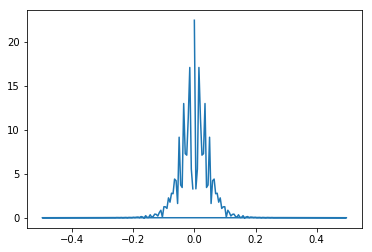

In [68]:
heat_map1 = []
heat_map2 = []
for i in range(8):
    for j in range(6):
        time,B,N = model_results(param_g[7-i],param_exo[j])
        heat_map1.append(get_period(B))
        heat_map2.append(get_period(N))
heat_map1 = np.asarray(heat_map1).reshape((8,6))
heat_map2 = np.asarray(heat_map1).reshape((8,6))
print(get_period(model_results(param_g[7-4],param_exo[j])[1],True))
print(heat_map1[4][1])

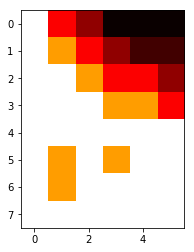

In [55]:
plt.imshow(heat_map1, cmap='hot', interpolation='nearest')
plt.show()

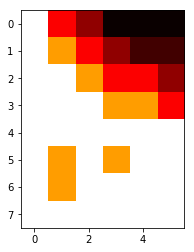

In [56]:
plt.imshow(heat_map2, cmap='hot', interpolation='nearest')
plt.show()